<a href="https://colab.research.google.com/github/manish211215/recommendor-system/blob/master/RecomSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Recommendor systems

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train_data = pd.read_csv("/content/train.csv")

In [5]:
train_data.head()

,user_id,sex,age,occupation,movie title,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp
0,173,M,56,other,Evita (1996),289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988
1,607,F,49,healthcare,Raiders of the Lost Ark (1981),174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516
2,600,M,34,programmer,Natural Born Killers (1994),53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563
3,104,M,27,student,Beverly Hills Ninja (1997),456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853
4,486,M,39,educator,"Frighteners, The (1996)",123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278


In [6]:
train_exp = train_data

In [7]:
train_exp['male'] = pd.get_dummies(train_exp.sex,drop_first=True)

In [8]:
train_exp.drop(['occupation','sex'],axis = 1,inplace=True)

In [9]:
train_exp.drop(['movie title'],inplace = True,axis = 1)

In [10]:
train_exp

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,683,42,301,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,893283728,1
79996,191,33,750,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,891560253,1
79997,625,27,169,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,891263665,1
79998,128,24,402,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,879969136,0


In [11]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [12]:
ratings = pd.DataFrame(train_exp.groupby('movie_id')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(train_exp.groupby('movie_id')['rating'].count())

In [13]:
ratings.head()

,rating,num of ratings
movie_id,,
1,3.908012,337
2,3.257143,105
3,3.069444,72
4,3.593939,165
5,3.310811,74


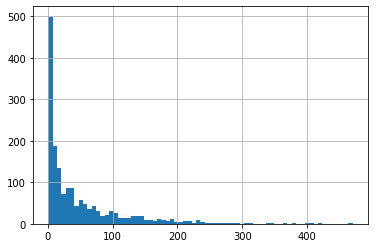

In [14]:
ratings['num of ratings'].hist(bins=70)

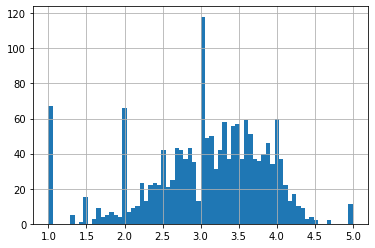

In [15]:
ratings['rating'].hist(bins=70)

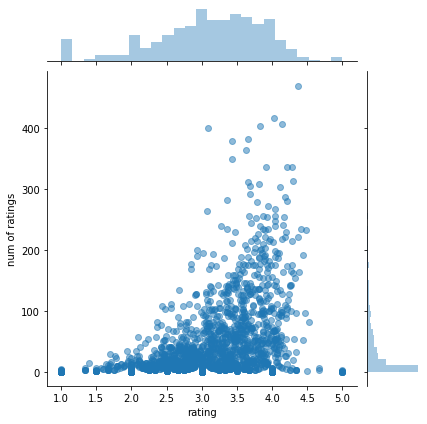

In [16]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha=0.5)

In [17]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [18]:
df = train_exp[['user_id','movie_id','rating','unix_timestamp']]

In [19]:
df.head()

,user_id,movie_id,rating,unix_timestamp
0,173,289,4,877556988
1,607,174,3,883879516
2,600,53,4,888452563
3,104,456,3,888465853
4,486,123,3,879875278


In [20]:
moviemat = df.pivot_table(index='user_id',columns='movie_id',values='rating')

In [21]:
moviemat

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1631,1632,1633,1636,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1651,1652,1653,1654,1655,1656,1658,1659,1660,1661,1662,1663,1664,1665,1668,1669,1670,1671,1672,1674,1677,1678,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,NaN,5.0,NaN,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,1.0,3.0,NaN,5.0,4.0,2.0,1.0,2.0,2.0,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# moviemat.columns[0]
# moviemat.drop(moviemat.columns[2],axis=1)

In [23]:
    movie_1_user_rating = moviemat.iloc[:,0]

In [ ]:
similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
    corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
    corr_movie1.dropna(inplace = True)
    corr_movie1 = corr_movie1.join(ratings['num of ratings'])
    g  = corr_movie1[corr_movie1['num of ratings']>90 ].sort_values('Correlation',ascending=False).head(5)
    if (g.shape[0]>0):
      s = tuple(g.index)
      final_list.append(s)
      for i in list(s):
        if (i in moviemat.columns):
            moviemat.drop(i,inplace=True,axis=1)
        
    else:
      moviemat.drop(moviemat.columns[0],inplace=True,axis=1)
    print(moviemat.shape)

In [70]:
similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [72]:
similar_to_movie1

movie_id
1       1.000000
2       0.231588
3       0.069171
4       0.029686
5       0.331626
          ...   
1677         NaN
1678         NaN
1680         NaN
1681         NaN
1682         NaN
Length: 1649, dtype: float64

In [74]:
corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])

In [75]:
corr_movie1

,Correlation
movie_id,
1,1.000000
2,0.231588
3,0.069171
4,0.029686
5,0.331626
...,...
1677,NaN
1678,NaN
1680,NaN


In [76]:
corr_movie1 = corr_movie1.join(ratings['num of ratings'])

In [78]:
corr_movie1.head(20)

,Correlation,num of ratings
movie_id,,
1,1.000000,337
2,0.231588,105
3,0.069171,72
4,0.029686,165
5,0.331626,74
6,0.801784,17
7,0.211754,309
8,0.287030,176
9,0.032361,235


In [24]:
final_list= []
while moviemat.shape[1]>0:
    movie_1_user_rating = moviemat.iloc[:,0]
    similar_to_movie1 = moviemat.corrwith(movie_1_user_rating)
    corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
    corr_movie1.dropna(inplace = True)
    corr_movie1 = corr_movie1.join(ratings['num of ratings'])
    g  = corr_movie1[corr_movie1['num of ratings']>90   ].sort_values('Correlation',ascending=False).head(5)
    if (g.shape[0]>0):
      s = tuple(g.index)
      final_list.append(s)
      for i in list(s):
        if (i in moviemat.columns):
            moviemat.drop(i,inplace=True,axis=1)
        
    else:
      moviemat.drop(moviemat.columns[0],inplace=True,axis=1)
    print(moviemat.shape)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


(943, 1644)
(943, 1639)
(943, 1634)
(943, 1629)
(943, 1624)
(943, 1619)
(943, 1614)
(943, 1609)
(943, 1604)
(943, 1599)
(943, 1594)
(943, 1589)
(943, 1584)
(943, 1579)
(943, 1574)
(943, 1569)
(943, 1564)
(943, 1559)
(943, 1554)
(943, 1549)
(943, 1544)
(943, 1539)
(943, 1534)
(943, 1529)
(943, 1524)
(943, 1519)
(943, 1514)
(943, 1509)
(943, 1504)
(943, 1499)
(943, 1494)
(943, 1489)
(943, 1484)
(943, 1479)
(943, 1474)
(943, 1469)
(943, 1464)
(943, 1459)
(943, 1454)
(943, 1449)
(943, 1444)
(943, 1439)
(943, 1434)
(943, 1429)
(943, 1424)
(943, 1419)
(943, 1414)
(943, 1409)
(943, 1404)
(943, 1399)
(943, 1394)
(943, 1389)
(943, 1384)
(943, 1379)
(943, 1374)
(943, 1369)
(943, 1364)
(943, 1359)
(943, 1354)
(943, 1349)
(943, 1348)
(943, 1347)
(943, 1346)
(943, 1345)
(943, 1344)
(943, 1343)
(943, 1342)
(943, 1341)
(943, 1340)
(943, 1339)
(943, 1338)
(943, 1337)
(943, 1336)
(943, 1335)
(943, 1334)
(943, 1333)
(943, 1332)
(943, 1331)
(943, 1330)
(943, 1329)
(943, 1328)
(943, 1327)
(943, 1326)
(943

In [25]:
print(moviemat.shape)

(943, 0)


In [26]:
print(final_list)

[(1, 692, 501, 418, 161), (2, 879, 304, 303, 411), (321, 596, 690, 322, 735), (447, 332, 326, 176, 514), (527, 270, 750, 24, 866), (739, 474, 29, 241, 239), (748, 531, 628, 137, 751), (763, 193, 358, 659, 333), (177, 196, 449, 410, 195), (150, 217, 22, 655, 325), (282, 55, 559, 87, 249), (310, 227, 96, 252, 228), (132, 14, 343, 66, 746), (231, 157, 230, 315, 135), (403, 202, 443, 475, 79), (214, 482, 111, 597, 123), (307, 298, 13, 82, 271), (845, 285, 566, 192, 472), (291, 238, 88, 154, 435), (246, 402, 72, 125, 81), (511, 56, 550, 357, 121), (129, 520, 208, 1028, 77), (319, 1047, 7, 324, 240), (268, 168, 265, 293, 134), (276, 679, 286, 631, 294), (185, 197, 521, 156, 385), (127, 229, 1016, 331, 237), (94, 117, 218, 175, 191), (28, 15, 289, 213, 200), (53, 582, 405, 433, 183), (118, 255, 198, 58, 169), (173, 451, 288, 42, 95), (684, 147, 215, 9, 283), (174, 508, 68, 380, 226), (170, 257, 188, 11, 97), (546, 148, 98, 182, 194), (64, 473, 243, 211, 476), (216, 203, 151, 89, 483), (38, 25

In [27]:
# recommender(moviemat,ratings)

In [28]:
train_exp.head()

,user_id,age,movie_id,rating,Musical,unknown,Action,Adventure,Children's,Fantasy,Film-Noir,Horror,Mystery,Romance,Thriller,War,Sci-Fi,Western,unix_timestamp,male
0,173,56,289,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,877556988,1
1,607,49,174,3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,883879516,0
2,600,34,53,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,888452563,1
3,104,27,456,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,888465853,1
4,486,39,123,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,879875278,1


In [29]:
x = train_exp.groupby(['user_id','movie_id',],as_index=False)['rating'].mean()

In [30]:
x.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [31]:
x.shape

(80000, 3)

In [32]:
# def string_make(m):
#   n=""
#   for i in m:
#     n = n+','+str(i)
#   return n

In [33]:
# a = [2,3,5]
# t = a.copy()
# b = a.copy()
# b.remove(3)
# print(b)
# print(a)

In [34]:
#
dict_recommended ={'recommend_list':[],'movie_id':[]}
for i in final_list:
  g = sorted(i)
  for k in g:
    dict_recommended['movie_id'].append(k)
    a = g.copy()
    a.remove(k)
    dict_recommended['recommend_list'].append(a)

In [35]:
len(dict_recommended['recommend_list'])

300

In [37]:
dict_recommended

{'movie_id': [1,
  161,
  418,
  501,
  692,
  2,
  303,
  304,
  411,
  879,
  321,
  322,
  596,
  690,
  735,
  176,
  326,
  332,
  447,
  514,
  24,
  270,
  527,
  750,
  866,
  29,
  239,
  241,
  474,
  739,
  137,
  531,
  628,
  748,
  751,
  193,
  333,
  358,
  659,
  763,
  177,
  195,
  196,
  410,
  449,
  22,
  150,
  217,
  325,
  655,
  55,
  87,
  249,
  282,
  559,
  96,
  227,
  228,
  252,
  310,
  14,
  66,
  132,
  343,
  746,
  135,
  157,
  230,
  231,
  315,
  79,
  202,
  403,
  443,
  475,
  111,
  123,
  214,
  482,
  597,
  13,
  82,
  271,
  298,
  307,
  192,
  285,
  472,
  566,
  845,
  88,
  154,
  238,
  291,
  435,
  72,
  81,
  125,
  246,
  402,
  56,
  121,
  357,
  511,
  550,
  77,
  129,
  208,
  520,
  1028,
  7,
  240,
  319,
  324,
  1047,
  134,
  168,
  265,
  268,
  293,
  276,
  286,
  294,
  631,
  679,
  156,
  185,
  197,
  385,
  521,
  127,
  229,
  237,
  331,
  1016,
  94,
  117,
  175,
  191,
  218,
  15,
  28,
  200,
  213,
  

In [38]:
data_recom = pd.DataFrame(dict_recommended)

In [39]:
data_recom.head()

,recommend_list,movie_id
0,"[161, 418, 501, 692]",1
1,"[1, 418, 501, 692]",161
2,"[1, 161, 501, 692]",418
3,"[1, 161, 418, 692]",501
4,"[1, 161, 418, 501]",692


In [40]:
x

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79995,943,1067,2
79996,943,1074,4
79997,943,1188,3
79998,943,1228,3


In [41]:
t = x[x['rating']>=3]

In [42]:
t

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79991,943,928,5
79996,943,1074,4
79997,943,1188,3
79998,943,1228,3


In [43]:
t.shape

(65998, 3)

In [44]:
y =pd.merge(t, data_recom, how ='inner', on ='movie_id') 

In [45]:
y

,user_id,movie_id,rating,recommend_list
0,1,1,5,"[161, 418, 501, 692]"
1,2,1,4,"[161, 418, 501, 692]"
2,5,1,4,"[161, 418, 501, 692]"
3,6,1,4,"[161, 418, 501, 692]"
4,10,1,4,"[161, 418, 501, 692]"
...,...,...,...,...
42496,872,1047,4,"[7, 240, 319, 324]"
42497,880,1047,3,"[7, 240, 319, 324]"
42498,887,1047,5,"[7, 240, 319, 324]"
42499,901,1047,3,"[7, 240, 319, 324]"


In [46]:
z = y.groupby('user_id')['recommend_list'].sum()

In [44]:
z

user_id
1      [964, 973, 1333, 1372, 1152, 1278, 1305, 1471,...
2      [964, 973, 1333, 1372, 884, 916, 991, 1291, 35...
3      [172, 174, 277, 928, 486, 543, 733, 1284, 518,...
4      [706, 1484, 1496, 1541, 411, 658, 710, 729, 89...
5      [964, 973, 1333, 1372, 1152, 1278, 1305, 1471,...
                             ...                        
939    [920, 1085, 1412, 1442, 572, 689, 734, 772, 58...
940    [1038, 1123, 1159, 1321, 911, 1280, 1534, 1598...
941    [964, 973, 1333, 1372, 1038, 1123, 1159, 1321,...
942    [706, 1484, 1496, 1541, 1212, 1317, 1455, 1544...
943    [1152, 1278, 1305, 1471, 911, 1280, 1534, 1598...
Name: recommend_list, Length: 943, dtype: object

In [47]:
z.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [48]:
maha = list(z.index)

In [49]:
maha[0]

1

In [50]:
type(z[943])

list

In [51]:
li = [2,5,6,8,9]
# random(li)

In [52]:
import random

In [53]:
set([random.choice(li) for i in range(0,10)])

{2, 5, 8, 9}

In [54]:
type(z)

pandas.core.series.Series

In [56]:
import collections

In [63]:

def sort_dictionary(orders):
  list_fanal = []
  orders = collections.Counter(orders)
  sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)
  for i in sort_orders:
	   list_fanal.append(i[0])
  return list_fanal
list_fanal = []
for i in z.index:
  naha = sort_dictionary(z[i])
  if len(naha)>=10:
    boo = naha[0:10]
  else:
    boo = naha
  list_fanal.append(boo)

In [64]:
len(list_fanal)

943

In [65]:

def strmk(j):
  x=""
  for i in j:
     x = x+','+str(i)
  return x
  

In [66]:
list_fanal[0]

[462, 402, 11, 273, 94, 50, 209, 235, 325, 655]

In [67]:
strmk(list_fanal[0])

',462,402,11,273,94,50,209,235,325,655'

In [68]:
for i,k in enumerate(z.index):
  print(str(k)+strmk(list_fanal[i]) )

1,462,402,11,273,94,50,209,235,325,655
2,82,271,298,307,187,199,419,229,331,1016
3,596,690,735,25,86,393,484,2,304,411
4,133,272,471,12,209,235,462,260,38,250
5,288,451,12,462,202,475,53,582,161,501
6,151,385,732,222,235,462,28,289,121,550
7,83,181,550,508,91,475,151,203,216,483
8,252,310,227,228,69,346,431,99,178,223
9,631,679,276,294,286,12,209,235,462,48
10,70,340,651,663,48,190,185,197,385,521
11,270,866,250,568,154,435,147,283,684,527
12,200,213,289,227,252,310,11,188,257,89
13,283,184,250,340,121,248,380,403,148,190
14,184,292,95,451,319,324,1047,209,235,462
15,28,200,213,86,393,484,531,628,751,496
16,418,501,403,475,148,546,190,223,509,685
17,631,679,276,294,286,161,418,501,692,82
18,289,475,203,347,222,161,501,147,684,28
19,83,485,528,657,62,248,367,498,79,403
20,182,546,8,756,148,194,204,323,98,186
21,319,1047,240,324,509,603,685,7,596,690
22,443,475,252,310,191,218,88,291,38,455
23,151,203,216,483,89,248,498,252,310,197
24,631,679,240,319,1047,121,511,550,73,91
25,161,418,393

In [259]:
z.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=907)

In [59]:
ddddd = [5,44,55,88,32,44,66,2,5,5,6,6]

In [65]:
import collections

In [68]:
sorted(collections.Counter(ddddd))

[2, 5, 6, 32, 44, 55, 66, 88]

In [74]:
collections.Counter(ddddd)[2]

1

In [78]:
def sort_dictionary(orders):
  list_fanal = []
  orders = collections.Counter(orders)
  sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)
  for i in sort_orders:
	   list_fanal.append(i[0])
  return list_fanal

In [79]:
sort_dictionary(ddddd)

[5, 44, 6, 55, 88, 32, 66, 2]